In [1]:
import condastats
from condastats.cli import overall, pkg_platform, pkg_version, pkg_python, data_source
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [19]:
df = overall(['matplotlib', 'numpy', 'scipy', 'pandas', 'jupyter', 'jupyterlab', 'xarray', 'dask', 'bokeh'], start_month='2017-01', monthly=True).to_frame()
df.head()

counts
pkg_name time             
bokeh    2017-01   95813.0
         2017-02  118664.0
         2017-03  116873.0
         2017-04  156768.0
         2017-05  158068.0

In [20]:
df = df.set_index([df.index.get_level_values(level='pkg_name'), pd.to_datetime(df.index.get_level_values(level='time'))])
df.index

MultiIndex([(     'bokeh', '2017-01-01'),
            (     'bokeh', '2017-02-01'),
            (     'bokeh', '2017-03-01'),
            (     'bokeh', '2017-04-01'),
            (     'bokeh', '2017-05-01'),
            (     'bokeh', '2017-06-01'),
            (     'bokeh', '2017-07-01'),
            (     'bokeh', '2017-08-01'),
            (     'bokeh', '2017-09-01'),
            (     'bokeh', '2017-10-01'),
            ...
            ('jupyterlab', '2019-09-01'),
            ('jupyterlab', '2019-10-01'),
            ('jupyterlab', '2019-11-01'),
            ('jupyterlab', '2019-12-01'),
            ('jupyterlab', '2020-01-01'),
            ('jupyterlab', '2020-02-01'),
            ('jupyterlab', '2020-03-01'),
            ('jupyterlab', '2020-04-01'),
            ('jupyterlab', '2020-05-01'),
            ('jupyterlab', '2020-06-01')],
           names=['pkg_name', 'time'], length=376)

In [21]:
df_unstack = df.unstack(level=0)
df_unstack

counts                                                       \
pkg_name       bokeh      dask   jupyter matplotlib      numpy     pandas   
time                                                                        
2017-01-01   95813.0   64062.0   74204.0   230664.0   464875.0   253587.0   
2017-02-01  118664.0   79414.0   98640.0   342486.0   574706.0   287581.0   
2017-03-01  116873.0  100800.0   95756.0   407898.0   713001.0   305028.0   
2017-04-01  156768.0  130140.0  115839.0   395696.0   639419.0   374032.0   
2017-05-01  158068.0  136451.0  111468.0   433970.0   652633.0   421278.0   
2017-06-01  142251.0  123636.0   97040.0   419788.0   684373.0   386988.0   
2017-07-01  149580.0  125375.0  103338.0   425983.0   783655.0   416581.0   
2017-08-01  159072.0  142174.0  102246.0   472950.0   831442.0   472880.0   
2017-09-01  166072.0  144981.0  119457.0   404088.0   734583.0   419568.0   
2017-10-01  222675.0  198250.0  162959.0   487775.0   977486.0   497473.0   
2017-11-01  197288.0  195660.0  148859.0   425982.0   875636.0   491981.0   
2017-12-01  280365.0  236665.0  109235.0   456521.0   896197.0   502551.0   
2018-01-01  301842.0  281157.0  127809.0   572904.0  1174942.0   638336.0   
2018-02-01  286966.0  277746.0  166030.0   512715.0  1126097.0   563629.0   
2018-03-01  276822.0  264048.0  171989.0   552758.0  1236583.0   552127.0   
2018-04-01  189972.0  170355.0  125996.0   438844.0  1008888.0   460560.0   
2018-05-01  222787.0  217742.0  146515.0   514604.0  1269944.0   585869.0   
2018-06-01  227423.0  214309.0  141873.0   497388.0  1332532.0   634674.0   
2018-07-01  233152.0  224997.0  149348.0   548981.0  1481141.0   743707.0   
2018-08-01  232570.0  228958.0  220255.0   699722.0  1662140.0   832364.0   
2018-09-01  324770.0  334768.0  265800.0   672242.0  1676506.0   763980.0   
2018-10-01  515925.0  519402.0  357462.0   866647.0  2184717.0   905153.0   
2018-11-01  371992.0  344856.0  324180.0   952905.0  2107895.0   977088.0   
2018-12-01  243876.0  209483.0  278889.0   828171.0  2114837.0   822035.0   
2019-01-01  279358.0  221200.0  276507.0   815169.0  2301341.0   932443.0   
2019-02-01  302344.0  260772.0  335551.0   835149.0  2525357.0  1049595.0   
2019-03-01  340743.0  310644.0  424333.0  1061567.0  3360284.0  1268802.0   
2019-04-01  326628.0  280595.0  326637.0   860197.0  2903185.0  1097222.0   
2019-05-01  346019.0  303449.0  327297.0  1079200.0  3523340.0  1333994.0   
2019-06-01  325507.0  272792.0  293201.0   950642.0  3352122.0  1161773.0   
2019-07-01  332256.0  308261.0  272999.0   697976.0  3075254.0  1023263.0   
2019-08-01  381237.0  328254.0  193619.0   589367.0  2332592.0  1065872.0   
2019-09-01  283867.0  329970.0  182388.0   620929.0  1543564.0   858497.0   
2019-10-01  276427.0  377488.0  199348.0   583948.0  1631313.0   985868.0   
2019-11-01  381490.0  345924.0  160956.0   582009.0  1922880.0  1076141.0   
2019-12-01  344104.0  237930.0  132522.0   679451.0  1462875.0  1154434.0   
2020-01-01  407277.0  403831.0  284327.0  1003150.0  2436674.0  1386204.0   
2020-02-01  413234.0  409377.0  282174.0  1215635.0  2381189.0  1417490.0   
2020-03-01  503986.0  426843.0  297362.0  1156442.0  2710404.0  1576611.0   
2020-04-01  502411.0  447268.0  276895.0  1121035.0  2631855.0  1669577.0   
2020-05-01  435088.0  391928.0  244540.0   902269.0  2473292.0  1522967.0   
2020-06-01  485323.0  421907.0  269639.0   968506.0  3271717.0  1655576.0   

                                            
pkg_name        scipy    xarray jupyterlab  
time                                        
2017-01-01   336780.0    7863.0        NaN  
2017-02-01   451248.0   11388.0        NaN  
2017-03-01   568756.0    9623.0      335.0  
2017-04-01   494638.0   21783.0     2649.0  
2017-05-01   494171.0   20792.0     3650.0  
2017-06-01   514464.0   21118.0     3833.0  
2017-07-01   556253.0   18818.0     5817.0  
2017-08-01   607577.0   18218.0     6142.0  
2017-09-01   506410.0   21043.0     9076.0  
2017-10-

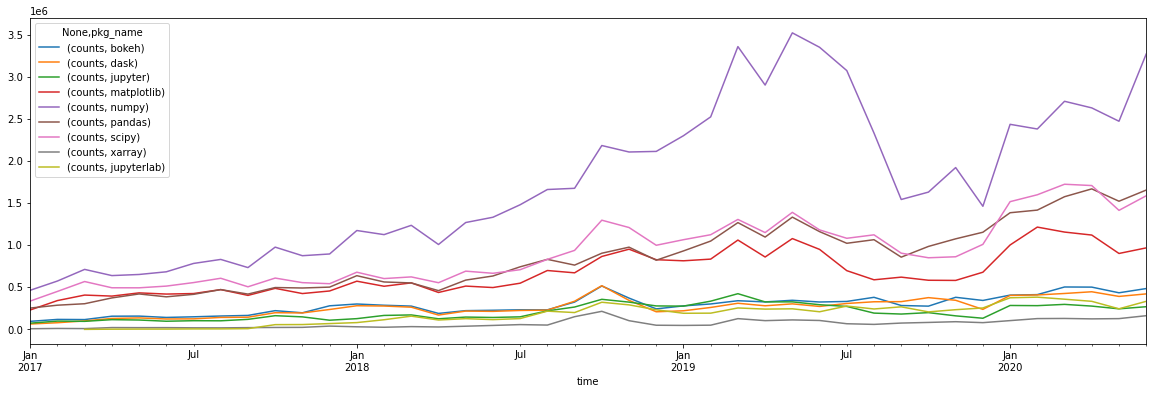

In [22]:
df.unstack(level=0).plot(kind='line', figsize=(20, 6));

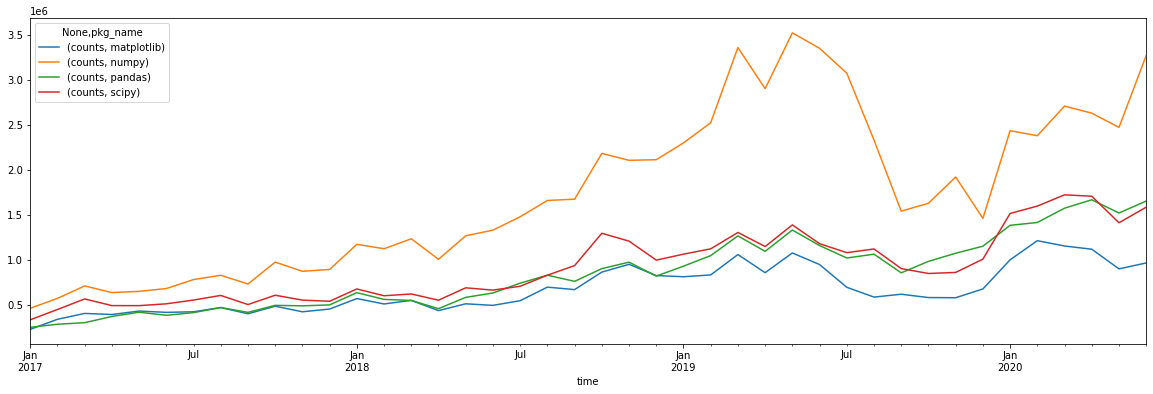

In [17]:
df.loc[['numpy','scipy','pandas','matplotlib']].unstack(level=0).plot(kind='line', figsize=(20, 6));

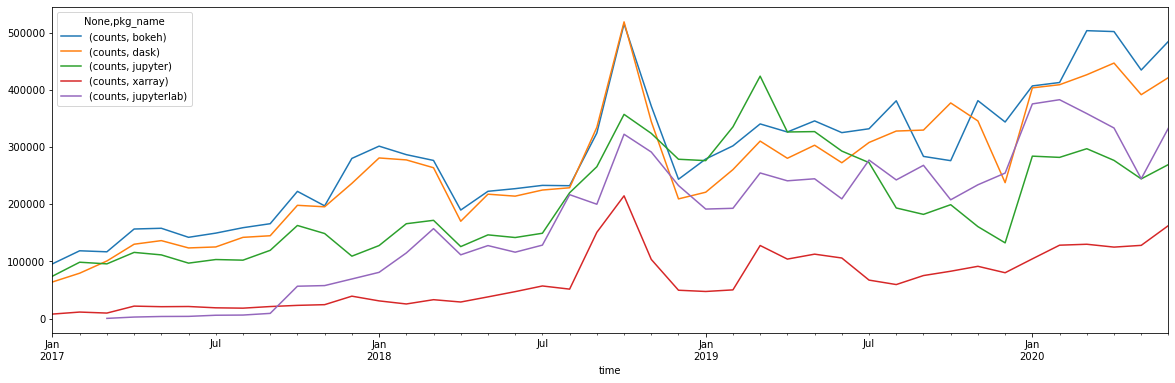

In [23]:
df.loc[['jupyter', 'jupyterlab', 'xarray', 'dask', 'bokeh']].unstack(level=0).plot(kind='line', figsize=(20, 6));

In [26]:
df_years = df_unstack.resample('Y', level=0).sum()
df_years.columns = df_years.columns.droplevel()
df_years

pkg_name,bokeh,dask,jupyter,matplotlib,numpy,pandas,scipy,xarray,jupyterlab
time,,,,,,,,,
2017-12-31,1963489.0,1677608.0,1339041.0,4903801.0,8828006.0,4829528.0,6238763.0,237300.0,215165.0
2018-12-31,3428097.0,3287821.0,2476146.0,7657881.0,18376222.0,8479522.0,9809045.0,831192.0,2101471.0
2019-12-31,3919980.0,3577279.0,3125358.0,9355604.0,29934107.0,13007904.0,13057770.0,1005168.0,2820295.0
2020-12-31,2747319.0,2501154.0,1654937.0,6367037.0,15905131.0,9228425.0,9553522.0,779152.0,2029734.0


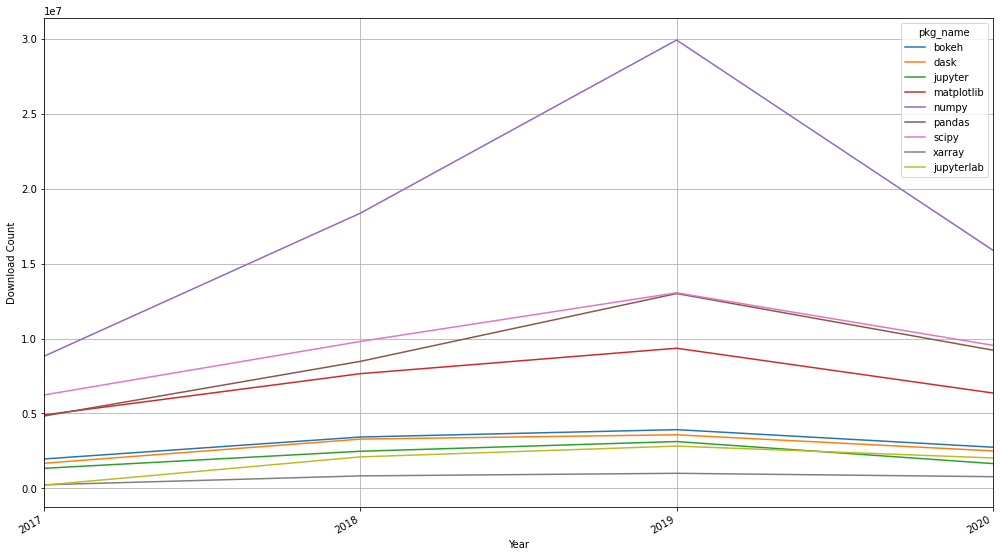

In [27]:
fig, ax = plt.subplots(figsize=(17, 10))
df_years.plot(kind='line', ax=ax, grid=True)
ax.set(xlabel='Year', ylabel='Download Count', xlim=(df_years.index.min(), df_years.index.max()))
ax.xaxis_date()
fig.autofmt_xdate()

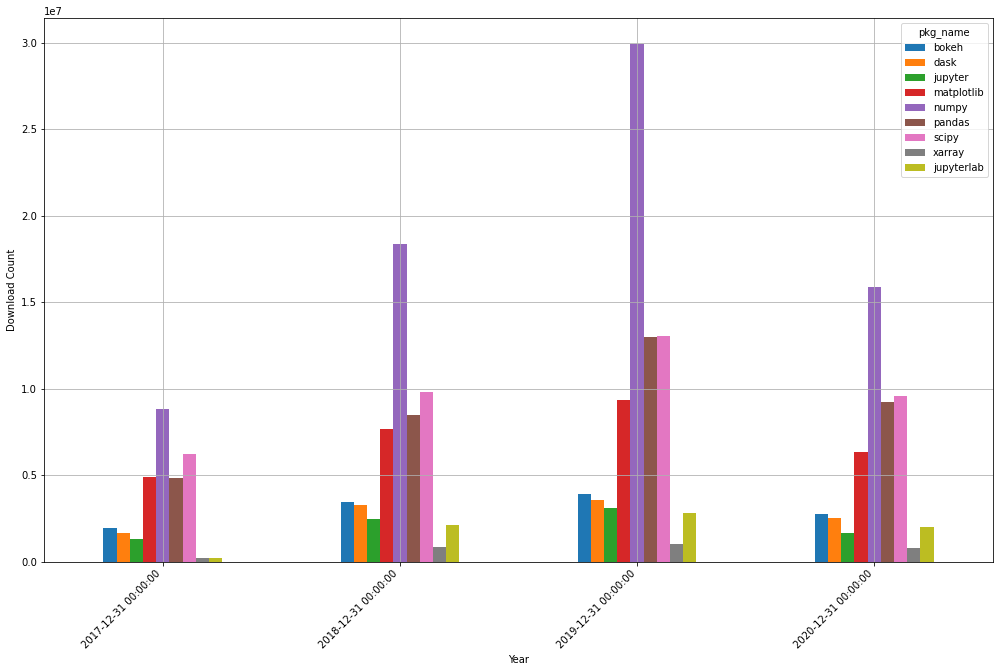

In [28]:
fig, ax = plt.subplots(figsize=(17, 10))
df_years.plot(kind='bar', ax=ax, grid=True)
ax.set(xlabel='Year', ylabel='Download Count')
ax.xaxis_date()
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.show()